### If you have not installed statmanager-kr, follow the steps below. 

In [ ]:
# If you have already installed statmanager-kr, do not run. Just skip. 
# If this not work, just trun on the terminal and enter pip install statmanager-kr 


pip install statmanager-kr

<hr>   

##### Before you start, make sure that you installed statmanager-kr and downloaded test data files via github repository.
##### If not, download a folder named "testdata" (https://github.com/ckdckd145/statmanager-kr/tree/main/testdata).

##### If you need any more informations, click the link belows:   
Korean : https://cslee145.notion.site/fd776d4f9a4f4c9db2cf1bbe60726971?v=3b2b237555fc4cd3a41a8da337d80c01&pvs=4   
English : https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4   

<hr>

In [1]:
import pandas as pd
from statmanager import Stat_Manager

In [2]:
# making pandas.DataFrame 

df = pd.read_csv(r'testdata\testdf.csv', index_col = 'id') 
df

,condition,age,sex,location,income,prescore,postscore,fupscore
id,,,,,,,,
1,test_group,33,female,kor,237,7,10,5
2,test_group,26,female,kor,303,8,5,4
3,test_group,28,female,kor,327,2,4,2
4,test_group,25,female,usa,243,8,3,7
5,test_group,21,female,usa,409,2,10,4
6,test_group,39,male,usa,309,4,1,1
7,test_group,22,male,jpn,297,6,7,9
8,test_group,23,male,jpn,249,0,4,3
9,test_group,39,male,jpn,445,3,0,2


In [3]:
#making Stat_Manager() object

sm = Stat_Manager(df, language='eng') 

Stat_Manager object created successfully! (Version 1.7.2.4)

Method to check how to use: .howtouse()
Method for statistical analysis: .progress()

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****



In [16]:
# method for searching about how to use analyses via statmanager-kr 
# feel free to enter any keyword that you interested
sm.howtouse() 

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****

In .howtouse(), enter the keywords you want to search for the analysis:

Example 1. If you want to know how to apply ANOVA, sm.howtouse("ANOVA")
Example 2. If you want to know how to test normality, sm.howtouse("normality")
Example 3. If you want to know how to test nonparametric, sm.howtouse("Non-parametric")

If you want to know how to filter your data, enter sm.howtouse("selector")! 

The table below summarizes the implementation methods for each statistical analysis method applied to statmanager-kr.


,Purpose,method,vars,group_vars,posthoc
Analysis,,,,,
Kolmogorov-Smirnov Test,Check normality assumption,kstest,Variable to check for normality assumptions (str),NaN,NaN
Shapiro-Wilks Test,Check normality assumption,shapiro,Variable to check for normality assumptions (str),NaN,NaN
z-skeweness & z-kurtosis test,Check normality assumption,z_normal,Variable to check for normality assumptions (str),NaN,NaN
Levene Test,Check homoskedasticity assumption,levene,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
F-max Test,Check homoskedasticity assumption,fmax,Variable to check for homoskedasticity assumpt...,Group variable (str),NaN
Chi-Square Test,Cross-tabulation analysis,chi2_contingency,Variables to check for frequency differences (...,NaN,NaN
Fisher's Exact Test,Cross-tabulation analysis,fisher,Variables to check for frequency differences (...,NaN,NaN
Correlation analysis: Pearson r,Correlation analysis - Parametric test,pearsonr,Variables to check correlation (list),NaN,NaN
Correlation analysis: Spearman rho,Correlation analysis - Non-parametric test,spearmanr,Variables to check correlation (list),NaN,NaN



The table below describes how selector parameters are utilized to filter data in .progress(). 



,mean,format of selector argument,pandas operator
python operator,,,
if a == b:,Only the data where a is b,{'a' : 'b'},df.loc['a' == 'b']
if a != b:,Only the data where a is NOT b,"{'a' : {'!=', 'b'} }",df.loc['a' != 'b']
if a > b:,Only the data with a > b,"{'a' : {'>', 'b'} }",df.loc['a' > 'b']
if a >= b:,Only the data with a >= b,"{'a' : {'>=', 'b'} }",df.loc['a' >= 'b']
if a < b:,Only the data with a < b,"{'a' : {'<', 'b'} }",df.loc['a' < 'b']
if a <= b:,Only the data with a <= b,"{'a' : {'<=', 'b'} }",df.loc['a' <= 'b']


In [ ]:
# If you want to change language set as "KOREAN", run this cell. 
# This method can be used to change language set from "KOREAN" to "ENGLISH", of course. Just run sm.set_language('eng')

sm.set_language('kor') 

In [28]:
# If you want to progress analysis only to a filtered dataset under certain conditions, you can use the 'selector' parameter in the .progress()
# You can get information about how to use selector parameter, by running sm.howtouse('selector')

sm.howtouse('selector')

*****
↓↓ Check for the more details in documentation! ↓↓
https://cslee145.notion.site/60cbfcbc90614fe990e02ab8340630cc?v=4991650ae5ce4427a215d1043802f5c0&pvs=4 
*****



,mean,format of selector argument,pandas operator
python operator,,,
if a == b:,Only the data where a is b,{'a' : 'b'},df.loc['a' == 'b']
if a != b:,Only the data where a is NOT b,"{'a' : {'!=', 'b'} }",df.loc['a' != 'b']
if a > b:,Only the data with a > b,"{'a' : {'>', 'b'} }",df.loc['a' > 'b']
if a >= b:,Only the data with a >= b,"{'a' : {'>=', 'b'} }",df.loc['a' >= 'b']
if a < b:,Only the data with a < b,"{'a' : {'<', 'b'} }",df.loc['a' < 'b']
if a <= b:,Only the data with a <= b,"{'a' : {'<=', 'b'} }",df.loc['a' <= 'b']


In [5]:
# For example, if you want to know whether mean differences between prescore and postscore is significant or not ONLY in the 'test_group', you can run .progress() like this
# This means that you run the dependent samples t-test only in the dataframe filtered by condition == test_group. 

sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'], selector = {'condition' : 'test_group'})


# If you want to delete that filtering condition, just delete selector argument and run again. Of course, it can be done with selector = None.
# sm.progress(method = 'ttest_rel', vars = ['prescore', 'postscore'], selector = None)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*****
Note: Only data that meets the following conditions will be analyzed.
condition == test_group
*****

Dependent Samples T-test
Variables : prescore, postscore
n = 10
Descriptive analysis: 



,prescore,postscore
mean,4.00,5.00
median,3.50,4.50
sd,3.09,3.37



Test statistic = -0.723, df(degree of freedom) = 9, p = 0.488



In [27]:
#Independent Samples T-Test

sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female', 'male']
Decriptive analysis: 


,female,male
n,15.00,15.00
mean,27.33,28.00
median,26.00,26.00
sd,4.88,6.94


Test statistic = -0.304, p = 0.763
Degree of freedom = 28
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [8]:
# Independent Samples T-Test

sm.progress(method = 'ttest_ind', vars = 'age', group_vars = 'sex')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Indenpendent Samples T-test
Variable : age
Group variable : sex
Comparison group : ['female', 'male']
Decriptive analysis: 


,female,male
n,15.00,15.00
mean,27.33,28.00
median,26.00,26.00
sd,4.88,6.94


Test statistic = -0.304, p = 0.763
Degree of freedom = 28
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [22]:
# kolmogorov-smirnov Test

sm.progress(method = 'kstest', vars = 'age')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Kolmogorov-Smirnov Test
Variable : age
n = 30
Test statistics = 1.000, p = 0.000

Conclusion: The normality assumption is not met.
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [23]:
# Levene test between 'sex'

sm.progress(method = 'levene', vars = 'age', group_vars = 'sex')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Levene Test
Group variable : sex
Comparison groups : ['female', 'male']
Test statistics = 1.957, p = 0.173

Conclusion : The homoskedasticity assumption is met
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [24]:
#Chi-squared test

sm.progress(method = 'chi2_contingency', vars = ['sex', 'location'])

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Chi-Squared Test
Variables : sex, location

χ² = 13.000, p = 0.002
Contingency Table: 


location,jpn,kor,usa
sex,,,
female,0,9,6
male,9,3,3


Percentage of cells with expected frequency less than 5 = 66.67%
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [6]:
#Correlation test - Pearson's r

sm.progress(method = 'pearsonr', vars = ['age', 'income', 'prescore', 'postscore'])

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Correlation analysis: Pearson's r

n = 30
Note: Missing values are automatically deleted. 

age & income  :  Pearson's r = -0.051, p = 0.789
age & prescore  :  Pearson's r = -0.044, p = 0.816
age & postscore  :  Pearson's r = -0.351, p = 0.057
income & prescore  :  Pearson's r = -0.103, p = 0.588
income & postscore  :  Pearson's r = 0.051, p = 0.789
prescore & postscore  :  Pearson's r = -0.021, p = 0.914


,age,income,prescore,postscore
age,1.000,-0.051,-0.044,-0.351
income,-0.051,1.000,-0.103,0.051
prescore,-0.044,-0.103,1.000,-0.021
postscore,-0.351,0.051,-0.021,1.000


,Pearson's r,p-value
age & income,-0.051,0.789
age & prescore,-0.044,0.816
age & postscore,-0.351,0.057
income & prescore,-0.103,0.588
income & postscore,0.051,0.789
prescore & postscore,-0.021,0.914


* p < .05
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Bootstrap percentile method: Resampling No. = 10,000: 

95% confidence interval of prescore = [4.133, 6.133]
95% confidence interval of postscore = [3.233, 5.267]

The confidence intervals for the two distributions overlap. Therefore, the difference between the two distributions is not significant.

Reference:
Efron, B., & Tibshirani, R. (1986). Bootstrap methods for standard errors, confidence intervals, and other measures of statistical accuracy. Statistical Science, 1(1), 54-75.

Histogram: 



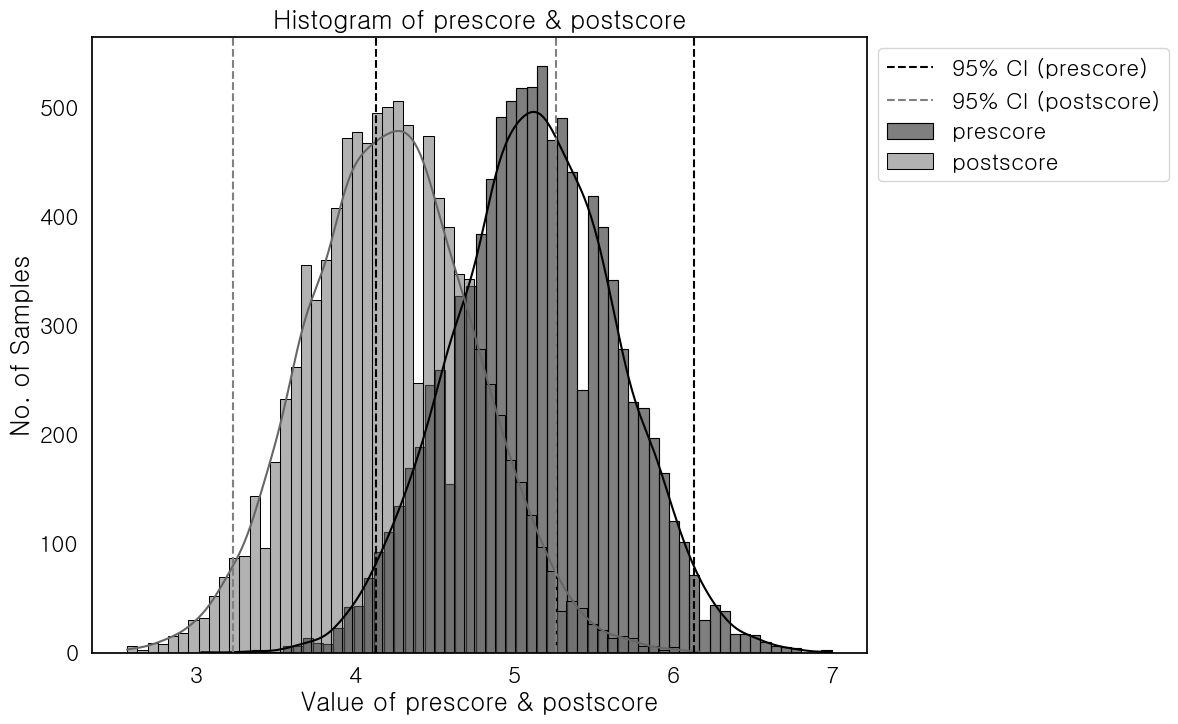

In [10]:
# Bootstrap percentile method with sampling 10,000 times.

sm.progress(method = 'bootstrap10000', vars = ['prescore', 'postscore'])


# If you want to progress this analysis in the context of between groups, you can run like this:
# sm.progress(method = 'bootstrap10000', vars = 'prescore', group_vars = 'sex', group_names = ['female', 'male'])

In [14]:
# One-way ANOVA without post-hoc test

sm.progress(method ='f_oneway', vars = 'age', group_vars = 'condition')

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group', 'sham_group', 'control_group']
Decriptive analysis: 


,test_group,sham_group,control_group
n,10.00,10.00,10.00
mean,28.50,28.30,26.20
median,27.00,29.00,25.50
sd,6.57,5.56,5.88


Test statistic = 0.448, p = 0.644
Degree of freedom (between groups) = 2, Degree of freedom (within groups) = 27
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [15]:
# If you want to proceed posthoc analysis, just provide True in posthoc parameter

sm.progress(method ='f_oneway', vars = 'age', group_vars = 'condition', posthoc = True)

# Default setting of posthoc method is bonferroni correction. You can use Tukey HSD by providing 'tukey' in posthoc_method paramter. (default -> posthoc_method = 'bonf')
# sm.progress(method ='f_oneway', vars = 'age', group_vars = 'condition', posthoc = True, posthoc_method = 'tukey') 

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
One-way ANOVA
Variable : age
Group variable : condition
Comparison group : ['test_group', 'sham_group', 'control_group']
Decriptive analysis: 


,test_group,sham_group,control_group
n,10.00,10.00,10.00
mean,28.50,28.30,26.20
median,27.00,29.00,25.50
sd,6.57,5.56,5.88


Test statistic = 0.448, p = 0.644
Degree of freedom (between groups) = 2, Degree of freedom (within groups) = 27
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Post-hoc:


group1,group2,stat,pval,pval_corr,reject
control_group,sham_group,-0.8204,0.4227,1.0,False
control_group,test_group,-0.8246,0.4204,1.0,False
sham_group,test_group,-0.0735,0.9422,1.0,False


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [18]:
# 2-way repeated measures ANOVA
# If you proceed the posthoc analysis, it will compute every main-effect and interactions. You can see belows.

sm.progress(method = 'f_nway_rm', vars = ['prescore', 'postscore', 'fupscore'], group_vars = 'condition', posthoc = True)

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
2-way Repeated Measures ANOVA

Dependent variables : ['prescore', 'postscore', 'fupscore'] 
Independent variables : ['condition', 'time']


Descripitive analysis: value by condition


,n,mean,median,std
condition,,,,
control_group,30,4.40,3.5,2.93
sham_group,30,4.87,4.0,2.54
test_group,30,4.47,4.0,2.96


Descripitive analysis: value by time


,n,mean,median,std
time,,,,
fupscore,30,4.37,4.0,2.62
postscore,30,4.23,4.0,2.91
prescore,30,5.13,5.5,2.85


Descripitive analysis: value by Interaction


n  mean  median   std
condition     time                             
control_group fupscore   10   3.7     3.0  2.79
              postscore  10   4.1     3.0  3.07
              prescore   10   5.4     5.0  2.95
sham_group    fupscore   10   5.0     4.0  2.58
              postscore  10   3.6     3.5  2.32
              prescore   10   6.0     6.0  2.36
test_group    fupscore   10   4.4     4.0  2.59
              postscore  10   5.0     4.5  3.37
              prescore   10   4.0     3.5  3.09

2-way Repeated Measures ANOVA Statistics:



,df,sum_sq,mean_sq,F,p-value
condition,2.0,3.822,1.911,0.242,0.786
time,2.0,14.156,7.078,0.896,0.412
condition:time,4.0,35.778,8.944,1.132,0.347
Residual,81.0,640.200,7.904,NaN,NaN


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Post-Hoc:

Posthoc test for main effect of condition


group1,group2,stat,pval,pval_corr,reject
control_group,sham_group,-0.6587,0.5127,1.0,False
control_group,test_group,-0.0877,0.9304,1.0,False
sham_group,test_group,0.5619,0.5764,1.0,False



Posthoc test for main effect of time


group1,group2,stat,pval,pval_corr,reject
fupscore,postscore,0.1866,0.8526,1.0,False
fupscore,prescore,-1.0849,0.2824,0.8473,False
postscore,prescore,-1.2106,0.231,0.6929,False


Posthoc test for interaction effect


group1,group2,stat,pval,pval_corr,reject
control_group_fupscore,control_group_postscore,-0.3048,0.764,1.0,False
control_group_fupscore,control_group_prescore,-1.3234,0.2023,1.0,False
control_group_fupscore,sham_group_fupscore,-1.0812,0.2939,1.0,False
control_group_fupscore,sham_group_postscore,0.0871,0.9315,1.0,False
control_group_fupscore,sham_group_prescore,-1.991,0.0619,1.0,False
control_group_fupscore,test_group_fupscore,-0.5813,0.5682,1.0,False
control_group_fupscore,test_group_postscore,-0.9401,0.3596,1.0,False
control_group_fupscore,test_group_prescore,-0.2278,0.8224,1.0,False
control_group_postscore,control_group_prescore,-0.9651,0.3473,1.0,False
control_group_postscore,sham_group_fupscore,-0.7093,0.4872,1.0,False


In [20]:
# Linear regression
# In this analysis, vars must be coded like this -> vars = ['dependent variable', ['independent variable1', 'independent variable2', ... ,]]
# Also, if you want to include categorical variables as independent variables, they must be dummy-coded, but this is not done automatically in current version. So, proceed aftering using other methods such as pd.get_dummies().

sm.progress(method = 'linearr', vars = ['age', ['income', 'prescore', 'postscore']])

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Linear Regression

Dependent variable: age
Independent variable: ['income', 'prescore', 'postscore']



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.263
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.308
Time:                        16:40:05   Log-Likelihood:                -93.285
No. Observations:                  30   AIC:                             194.6
Df Residuals:                      26   BIC:                             200.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0632      4.781      6.707      0.000      22.237      41.890
income        -0.0025      0.012     -0.211      0.835      -0.027       0.022
prescore      -0.1152      0.382     -0.302      0.765      -0.900       0.669
postscore     -0.7102      0.372     -1.907      0.068      -1.476       0.055
==============================================================================
Omnibus:                        2.576   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.104
Skew:                           0.520   Prob(JB):                        0.349
Kurtosis:                       2.225   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.026   
Dependent Variable: age              AIC:                194.5705
Date:               2023-12-04 16:40 BIC:                200.1753
No. Observations:   30               Log-Likelihood:     -93.285 
Df Model:           3                F-statistic:        1.263   
Df Residuals:       26               Prob (F-statistic): 0.308   
R-squared:          0.127            Scale:              33.928  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         32.0632    4.7805   6.7070  0.0000  22.2366  41.8897
income        -0.0025    0.0121  -0.2107  0.8348  -0.0273   0.0222
prescore      -0.1152    0.3817  -0.3018  0.7652  -0.8997   0.6693
postscore     -0.7102    0.3724  -1.9070  0.0676  -1.4756   0.0553
-----------------------------------------------------------------
Omnibus:              2.576        Durbin-Watson:           2.274
Prob(Omnibus):        0.276        Jarque-Bera (JB):        2.104
Skew:                 0.520        Prob(JB):                0.349
Kurtosis:             2.225        Condition No.:           1471 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

odds ratio (OR): 



const        8.411143e+13
income       9.974626e-01
prescore     8.912062e-01
postscore    4.915702e-01
dtype: float64

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [19]:
# One-way ANCOVA
# In this analysis, vars must be coded like this -> vars = ['dependent variable', ['covariate1', 'covariate2'] ]. (Like regression)

sm.progress(method = 'oneway_ancova', vars = ['age', ['income']], group_vars = 'condition')

# You can also proceed posthoc test by providing posthoc = True. But this is not recommended because in ANCOVA, pair-comparison must be proceed for EMMeans. So instead, checking 'Pair-Coef Result Table' would be better. 

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
One-way ANCOVA

Dependent variable: age
Group variable : condition
Comparision groups : ['test_group', 'sham_group', 'control_group']
Covariates: ['income']
Descriptive analysis: 


control_group  sham_group  test_group
age    n               10.00       10.00       10.00
       mean            26.20       28.30       28.50
       median          25.50       29.00       27.00
       sd               5.88        5.56        6.57
income n               10.00       10.00       10.00
       mean           274.70      344.00      324.70
       median         243.00      357.50      306.00
       sd             103.02       82.67       77.34

OLS Model Result: 


Dep. Variable:,age,R-squared:,0.045
Model:,OLS,Adj. R-squared:,-0.065
Method:,Least Squares,F-statistic:,0.4065
Date:,"Mon, 04 Dec 2023",Prob (F-statistic):,0.750
Time:,16:35:24,Log-Likelihood:,-94.638
No. Observations:,30,AIC:,197.3
Df Residuals:,26,BIC:,202.9
Df Model:,3,,
Covariance Type:,nonrobust,,



ANCOVA statistics: 


,sum_sq,df,F,p-value
Intercept,1754.3301,1.0,47.2481,0.0000
C(condition),42.6543,2.0,0.5744,0.5700
income,12.8160,1.0,0.3452,0.5619
Residual,965.3840,26.0,NaN,NaN


Pair-Coef Result Table: 
Note: If the regression coefficient (coef) of a pair is significant at the p < .05 level, it means that the difference between groups is significant despite controlling for covariates (['income']).
The regression coefficient (coef) reflects the difference in EMMeans. 


,coef,std err,t,p,0.025,0.975
Intercept,28.3416,4.123,6.874,0.000,19.866,36.817
control_group - sham_group,2.6403,2.876,0.918,0.367,-3.272,8.552
control_group - test_group,2.6898,2.805,0.959,0.346,-3.075,8.455
sham_group - test_group,0.0495,2.737,0.018,0.986,-5.577,5.676
income,-0.0078,0.013,-0.588,0.562,-0.035,0.019


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
